In [1]:
import os, io, sys

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [7]:
import random
import numpy as np
import tensorflow as tf
import pandas as pd

In [ ]:
random.seed(1693)
np.random.seed(1693)
tf.random.set_seed(1693)

In [27]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os

In [4]:
os.chdir("C:/Users/sunet/OneDrive/Desktop/AI and ML Projects/Bank Marketing Predicton")


In [8]:
data = pd.read_csv("bank-additional-mason.csv")
print("Dataset loaded successfully!")
y = data['y']
print("Shape of dataframe:", data.shape)

Dataset loaded successfully!
Shape of dataframe: (9576, 21)


In [9]:
print("Last 3 records of y:", y.iloc[-3:])

Last 3 records of y: 9573    yes
9574    yes
9575    yes
Name: y, dtype: object


In [10]:
x = data.drop(columns=['y'])
x_encoded = pd.get_dummies(x)
y_encoded = pd.get_dummies(y)

In [11]:
print("Shape of x dataframe:", x_encoded.shape)

print("First record of x dataframe:")
print(x_encoded.iloc[0:1])

print("Last 3 records of one-hot encoded y target:")
print(y_encoded.iloc[-3:])


Shape of x dataframe: (9576, 62)
First record of x dataframe:
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   17       432         3      4         2          -2.9          92.201   

   cons.conf.idx  euribor3m  nr.employed  ...  month_oct  month_sep  \
0          -31.4      0.884       5076.2  ...      False      False   

   day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0            False            False            False            False   

   day_of_week_wed  poutcome_failure  poutcome_nonexistent  poutcome_success  
0             True             False                 False              True  

[1 rows x 62 columns]
Last 3 records of one-hot encoded y target:
         no   yes
9573  False  True
9574  False  True
9575  False  True


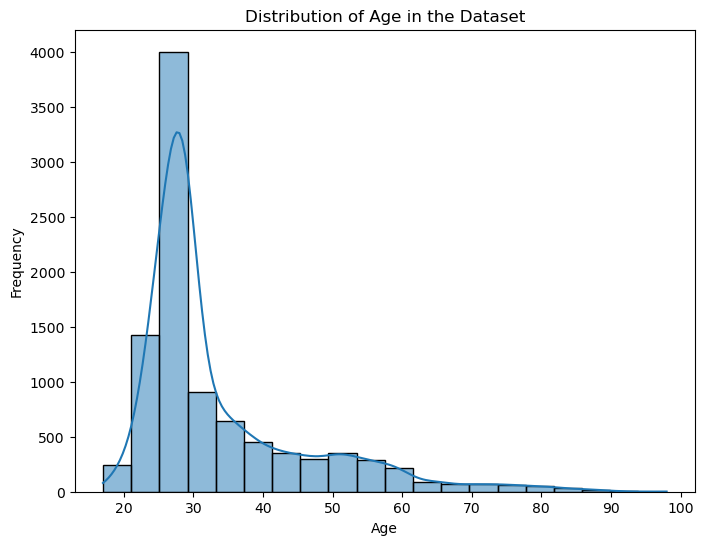

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Age in the Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_encoded, test_size=0.2, random_state=1693)

In [15]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
print("First 2 values in the y test set:")
print(y_test.iloc[:2])


First 2 values in the y test set:
         no    yes
4043   True  False
8514  False   True


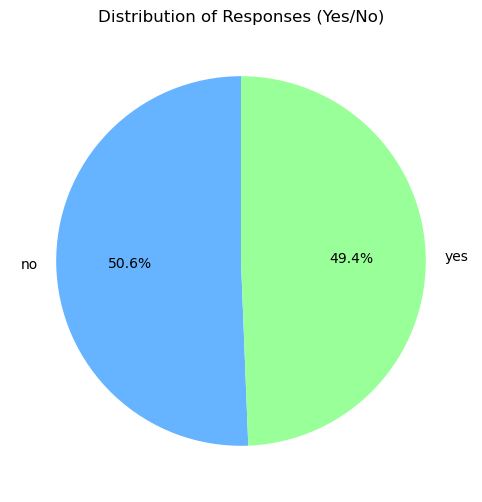

In [21]:
# Pie chart for target variable
target_counts = data['y'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=["#66b3ff", "#99ff99"])
plt.title('Distribution of Responses (Yes/No)')
plt.show()

In [26]:
model = Sequential(name="Model")
model.add(Dense(10, input_dim=x_encoded.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(y_encoded.shape[1], activation='softmax'))
model.summary()

C:\Users\sunet\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │             630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 736 (2.88 KB)

 Trainable params: 736 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=2000, epochs=200, verbose=0)

#Make predictions
pred1 = model.predict(x_test[5].reshape(1, -1))
print("Predicted probabilities for test case #5:", pred1)
pred_class = np.argmax(pred1)
print("Predicted label for test case #5:", pred_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted probabilities for test case #5: [[0.00344388 0.99655616]]
Predicted label for test case #5: 1


In [19]:
#Actual label for test case
actual_class = np.argmax(y_test.iloc[5])
print("Actual label for test case #5:", actual_class)

#Prediction for test case #5
print("Prediction for test case #5 (class):", pred_class)

#Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Evaluation Loss: {loss}, Accuracy: {accuracy}")

Actual label for test case #5: 1
Prediction for test case #5 (class): 1
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9103 - loss: 0.2150
Evaluation Loss: 0.2266516536474228, Accuracy: 0.9065762162208557


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


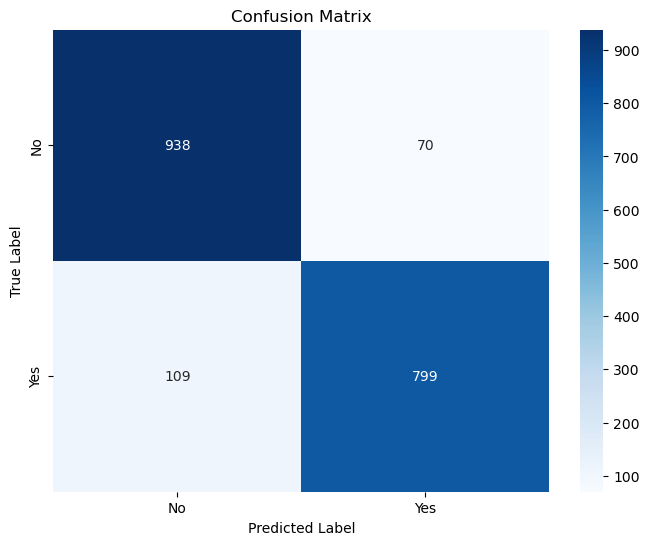

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_pred are the predicted labels, and y_test contains the true labels
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test.values, axis=1)

cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()